In [1]:
# Import & Install Dependencies
!pip install tensorflow tensorflow-gpu tensorflow-io matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\jasmi\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\jasmi\\AppData\\Local\\Temp\\pip-install-mg8o_p2m\\tensorflow-gpu_8b555115ac0c4f089d2b4c4fa1810810\\setup.py'"'"'; __file__='"'"'C:\\Users\\jasmi\\AppData\\Local\\Temp\\pip-install-mg8o_p2m\\tensorflow-gpu_8b555115ac0c4f089d2b4c4fa1810810\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\jasmi\AppData\Local\Temp\pip-wheel-tl00gl1k'
       cwd: C:\Users\jasmi\AppData\Local\Temp\pip-install-mg8o_p2m\tensorflow-gpu_8b555115ac0c4f089d2b4c4fa1810810\
  Complete output (17 lines):
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Us

  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
    Running setup.py install for tensorflow-gpu: started
    Running setup.py install for tensorflow-gpu: finished with status 'error'


In [2]:
# Load dependencies!
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

Data Loading Function!

In [3]:
# Defining paths!
Asthma_File = os.path.join('Data','Archive_2','Asthma','103_2b2_Ar_mc_LittC2SE.wav')
Bronchiectasis_File = os.path.join('Data','Archive_2','Bronchiectasis','111_1b2_Tc_sc_Meditron.wav')
Bronchiolitis_File = os.path.join('Data','Archive_2','Bronchiolitis','149_1b1_Al_sc_Meditron.wav')
COPD_File = os.path.join('Data','Archive_2','COPD','104_1b1_Al_sc_Litt3200.wav')
Healthy_File = os.path.join('Data','Archive_2','Healthy','102_1b1_Ar_sc_Meditron.wav')
LRTI_File = os.path.join('Data','Archive_2','LRTI','108_1b1_Al_sc_Meditron.wav')
Pneumonia_File = os.path.join('Data','Archive_2','Pneumonia','122_2b1_Al_mc_LittC2SE.wav')
URTI_File = os.path.join('Data','Archive_2','URTI','101_1b1_Al_sc_Meditron.wav')

In [4]:
def load_wav(filename):
    # Load wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channel)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000Hz - amp of audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [5]:
asth_wave = load_wav(Asthma_File)
bronchsis_wave = load_wav(Bronchiectasis_File)
bronchtis_wave = load_wav(Bronchiolitis_File)
COPD_wave = load_wav(COPD_File)
health_wave = load_wav(Healthy_File)
LRTI_wave = load_wav(LRTI_File)
Pneu_wave = load_wav(Pneumonia_File)
URTI_wave = load_wav(URTI_File)

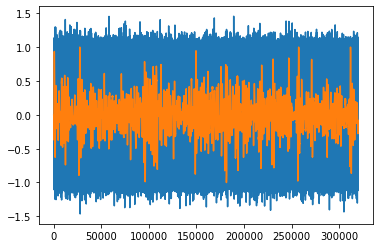

In [6]:
plt.plot(Pneu_wave)
plt.plot(asth_wave)
# plt.plot(bronchsis_wave)
# plt.plot(bronchtis_wave)
# plt.plot(COPD_wave)
# plt.plot(health_wave)
# plt.plot(LRTI_wave)
# plt.plot(URTI_wave)
plt.show()

Wave to Spectrogram!

In [7]:
# Defining paths (again)!
Asthma = os.path.join('Data','Archive_2','Asthma')
Bronchiectasis = os.path.join('Data','Archive_2','Bronchiectasis')
Bronchiolitis = os.path.join('Data','Archive_2','Bronchiolitis')
COPD = os.path.join('Data','Archive_2','COPD')
Healthy = os.path.join('Data','Archive_2','Healthy')
LRTI = os.path.join('Data','Archive_2','LRTI')
Pneumonia = os.path.join('Data','Archive_2','Pneumonia')
URTI = os.path.join('Data','Archive_2','URTI')

In [8]:
# Tensorflow Dataset
# Looks for any wav files in each directory
AsthmaTFDS = tf.data.Dataset.list_files(Asthma+'\*.wav')
BronchiectasisTFDS = tf.data.Dataset.list_files(Bronchiectasis+'\*.wav')
BronchiolitisTFDS = tf.data.Dataset.list_files(Bronchiolitis+'\*.wav')
COPDTFDS = tf.data.Dataset.list_files(COPD+'\*.wav')
HealthyTFDS = tf.data.Dataset.list_files(Healthy+'\*.wav')
LRTITFDS = tf.data.Dataset.list_files(LRTI+'\*.wav')
PneumoniaTFDS = tf.data.Dataset.list_files(Pneumonia+'\*.wav')
URTITFDS = tf.data.Dataset.list_files(URTI+'\*.wav')

In [9]:
Asthma_Samples = tf.data.Dataset.zip((AsthmaTFDS, tf.data.Dataset.from_tensor_slices(tf.fill(len(AsthmaTFDS), 'Asthma'))))

Bronchiectasis_Samples = tf.data.Dataset.zip((BronchiectasisTFDS, tf.data.Dataset.from_tensor_slices(tf.fill(len(BronchiectasisTFDS), 'Bronchiectasis'))))

Bronchiolitis_Samples = tf.data.Dataset.zip((BronchiolitisTFDS, tf.data.Dataset.from_tensor_slices(tf.fill(len(BronchiolitisTFDS), 'Bronchiolitis'))))

COPD_Samples = tf.data.Dataset.zip((COPDTFDS, tf.data.Dataset.from_tensor_slices(tf.fill(len(COPDTFDS), 'COPD'))))

Healthy_Samples = tf.data.Dataset.zip((HealthyTFDS, tf.data.Dataset.from_tensor_slices(tf.fill(len(HealthyTFDS), 'Healthy'))))

LRTI_Samples = tf.data.Dataset.zip((LRTITFDS, tf.data.Dataset.from_tensor_slices(tf.fill(len(LRTITFDS), 'LRTI'))))

Pneumonia_Samples = tf.data.Dataset.zip((PneumoniaTFDS, tf.data.Dataset.from_tensor_slices(tf.fill(len(PneumoniaTFDS), 'Pneumonia'))))

URTI_Samples = tf.data.Dataset.zip((URTITFDS, tf.data.Dataset.from_tensor_slices(tf.fill(len(URTITFDS), 'URTI'))))

all_data = []
print(len(all_data))
all_data = Asthma_Samples.concatenate(Bronchiectasis_Samples)
print(len(all_data))
all_data = all_data.concatenate(Bronchiolitis_Samples)
print(len(all_data))
all_data = all_data.concatenate(COPD_Samples)
print(len(all_data))
all_data = all_data.concatenate(Healthy_Samples)
print(len(all_data))
all_data = all_data.concatenate(LRTI_Samples)
print(len(all_data))
all_data = all_data.concatenate(Pneumonia_Samples)
print(len(all_data))
all_data = all_data.concatenate(URTI_Samples)
print(len(all_data))

0
34
60
1646
1716
1720
1794
1840


In [10]:
data_iterator = all_data.shuffle(500).as_numpy_iterator()
for item in all_data:
    print(data_iterator.next())

(b'Data\\Archive_2\\COPD\\130_3p4_Al_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\186_2b2_Pr_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\156_8b3_Al_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\213_1p2_Pr_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\211_1p2_Pl_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\Bronchiectasis\\116_1b2_Pl_sc_Meditron.wav', b'Bronchiectasis')
(b'Data\\Archive_2\\COPD\\200_2p4_Lr_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\139_1b1_Pl_sc_Litt3200.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\213_2p2_Al_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\130_3p3_Pl_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\151_2p3_Ll_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\130_1p3_Al_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\Bronchiolitis\\216_1b1_Pl_sc_Meditron.wav', b'Bronchiolitis')
(b'Data\\Archive_2\\COPD\\151_2p3_Lr_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\Bronchiectasis\\201_1b3_Ar_sc_Meditron.w

(b'Data\\Archive_2\\COPD\\130_1p2_Ll_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\104_1b1_Pr_sc_Litt3200.wav', b'COPD')
(b'Data\\Archive_2\\Bronchiectasis\\201_1b2_Al_sc_Meditron_1.wav', b'Bronchiectasis')
(b'Data\\Archive_2\\COPD\\213_1p5_Tc_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\174_1p2_Tc_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\156_2b3_Ll_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\104_1b1_Lr_sc_Litt3200_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\151_2p4_Al_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\157_1b1_Ar_sc_Meditron.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\170_1b4_Lr_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\163_8b3_Lr_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\138_1p2_Ar_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\200_2p3_Lr_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\130_1p2_Pr_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\186_2b4_Lr_mc_AKGC417L.wav', b'COPD')
(b'Dat

(b'Data\\Archive_2\\COPD\\130_3p4_Pr_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\Bronchiectasis\\111_1b3_Tc_sc_Meditron.wav', b'Bronchiectasis')
(b'Data\\Archive_2\\COPD\\162_2b4_Lr_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\200_2p4_Al_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\160_1b3_Al_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\177_1b4_Tc_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\147_2b4_Lr_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\162_1b2_Al_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\Bronchiectasis\\116_1b2_Tc_sc_Meditron.wav', b'Bronchiectasis')
(b'Data\\Archive_2\\COPD\\130_1p4_Ll_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\130_3p3_Pr_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\141_1b2_Lr_mc_LittC2SE_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\177_1b2_Pl_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\Bronchiolitis\\206_1b1_Ar_sc_Meditron_1.wav', b'Bronchiolitis')
(b'Data\\Archive_2\\COPD\\172_

(b'Data\\Archive_2\\COPD\\198_1b5_Lr_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\207_3b2_Pr_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\138_1p2_Al_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\107_2b3_Al_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\133_2p2_Ar_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\166_1p1_Ll_sc_Meditron_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\130_1p4_Pr_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\172_1b3_Ll_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\180_1b4_Pl_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\200_3p4_Al_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\218_1b1_Ar_sc_Meditron_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\207_3b2_Pl_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\158_1p3_Pr_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\221_2b1_Pl_mc_LittC2SE_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\154_2b4_Pl_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\133_

(b'Data\\Archive_2\\COPD\\114_1b4_Lr_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\157_1b1_Ar_sc_Meditron_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\145_3b4_Pl_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\213_1p2_Ar_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\151_2p4_Tc_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\146_2b4_Ar_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\120_1b1_Al_sc_Meditron_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\198_6p1_Pr_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\213_2p2_Pr_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\107_3p2_Pr_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\166_1p1_Pl_sc_Meditron.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\118_1b1_Pr_sc_Litt3200.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\130_1p4_Pr_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\172_1b5_Al_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\Healthy\\179_1b1_Tc_sc_Meditron_1.wav', b'Healthy')
(b'Data\\Archive_2\\Heal

(b'Data\\Archive_2\\COPD\\177_1b2_Lr_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\221_2b2_Lr_mc_LittC2SE.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\220_1b1_Tc_mc_LittC2SE_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\107_2b4_Pl_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\107_3p2_Al_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\176_1b4_Al_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\174_2p3_Ar_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\Healthy\\179_1b1_Al_sc_Meditron.wav', b'Healthy')
(b'Data\\Archive_2\\COPD\\113_1b1_Pr_sc_Litt3200_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\204_7p5_Ar_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\198_6p1_Al_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\Pneumonia\\135_2b3_Tc_mc_LittC2SE_1.wav', b'Pneumonia')
(b'Data\\Archive_2\\COPD\\107_3p2_Tc_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\162_2b3_Pr_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\207_3b2_Lr_mc_AKGC417L.wav', b'COPD')
(b'Data\\A

(b'Data\\Archive_2\\COPD\\107_2b4_Pr_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\Healthy\\194_1b1_Lr_sc_Meditron_1.wav', b'Healthy')
(b'Data\\Archive_2\\URTI\\188_1b1_Tc_sc_Meditron_1.wav', b'URTI')
(b'Data\\Archive_2\\Healthy\\153_1b1_Al_sc_Meditron_1.wav', b'Healthy')
(b'Data\\Archive_2\\Pneumonia\\140_2b2_Ll_mc_LittC2SE.wav', b'Pneumonia')
(b'Data\\Archive_2\\Pneumonia\\122_2b1_Ar_mc_LittC2SE.wav', b'Pneumonia')
(b'Data\\Archive_2\\COPD\\112_1p1_Ll_sc_Litt3200.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\204_7p5_Ll_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\172_1b3_Tc_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\Healthy\\159_1b1_Ar_sc_Meditron_1.wav', b'Healthy')
(b'Data\\Archive_2\\COPD\\221_2b2_Lr_mc_LittC2SE_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\130_1p3_Pl_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\170_1b2_Pr_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\URTI\\165_1b1_Pl_sc_Meditron_1.wav', b'URTI')
(b'Data\\Archive_2\\COPD\\200_2p3_Tc_mc_AKGC

Preprocessing and Function Building

In [11]:
def preprocess(file_path, label):
    wav = load_wav(file_path)
    wav = wav[:320000]
    zero_padding = tf.zeros([320000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

In [12]:
filepath, label = Healthy_Samples.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [13]:
spectrogram, label = preprocess(filepath, label)

In [14]:
spectrogram

<tf.Tensor: shape=(9991, 257, 1), dtype=float32, numpy=
array([[[7.07332897e+00],
        [5.97606421e+00],
        [4.20810127e+00],
        ...,
        [2.45517935e-03],
        [2.79931165e-03],
        [3.85022163e-03]],

       [[8.24134445e+00],
        [7.01374054e+00],
        [4.73589039e+00],
        ...,
        [2.24849302e-03],
        [2.35495111e-03],
        [4.14419174e-03]],

       [[9.51979828e+00],
        [7.46287489e+00],
        [3.39479923e+00],
        ...,
        [2.28190911e-03],
        [3.53827700e-03],
        [1.48820877e-03]],

       ...,

       [[1.09601078e+01],
        [1.03655500e+01],
        [9.09556198e+00],
        ...,
        [8.02064408e-03],
        [2.20605312e-03],
        [4.64916229e-04]],

       [[1.06985035e+01],
        [9.89075756e+00],
        [8.31816483e+00],
        ...,
        [8.85483529e-03],
        [2.72955396e-03],
        [6.70909882e-04]],

       [[8.79083061e+00],
        [7.85121584e+00],
        [6.05201578e+00]

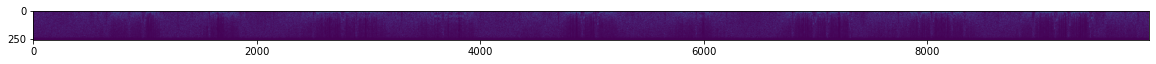

In [15]:
plt.figure(figsize=(20,30))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

Training and Testing Partitions!

In [16]:
# Tensorflow Data Pipeline
all_data = all_data.map(preprocess)
all_data = all_data.cache()
all_data = all_data.shuffle(buffer_size=1000)
all_data = all_data.batch(16)
all_data = all_data.prefetch(8)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [17]:
len(all_data)

115

In [18]:
# Testing and Training Partitions
train = all_data.take(92) #80%
test = all_data.skip(92).take(23) #20%

In [19]:
samples, labels = train.as_numpy_iterator().next()

In [20]:
samples.shape

(16, 9991, 257, 1)

In [21]:
labels

array([b'COPD', b'COPD', b'COPD', b'COPD', b'COPD', b'COPD', b'COPD',
       b'COPD', b'COPD', b'COPD', b'COPD', b'COPD', b'COPD', b'COPD',
       b'COPD', b'COPD'], dtype=object)

Building the model!!

In [22]:
# Import dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

In [23]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(9991, 257,1)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

ResourceExhaustedError: {{function_node __wrapped__Mul_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[40427376,128] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu [Op:Mul]